# <font color=#00BBFF> Loading Data </font>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff #This can create interactive plots
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo 
import plotly.express as px

In [3]:
# fetch dataset 
cirrhosis_patient_survival_prediction = fetch_ucirepo(id=878) 
  
# data (as pandas dataframes) 
X = cirrhosis_patient_survival_prediction.data.features 
y = cirrhosis_patient_survival_prediction.data.targets 
  
df_cancer = pd.concat([X, y], axis=1)
print(df_cancer) 


                Drug    Age Sex Ascites Hepatomegaly Spiders Edema  Bilirubin  \
0    D-penicillamine  21464   F       Y            Y       Y     Y       14.5   
1    D-penicillamine  20617   F       N            Y       Y     N        1.1   
2    D-penicillamine  25594   M       N            N       N     S        1.4   
3    D-penicillamine  19994   F       N            Y       Y     S        1.8   
4            Placebo  13918   F       N            Y       Y     N        3.4   
..               ...    ...  ..     ...          ...     ...   ...        ...   
413              NaN  24472   F     NaN          NaN     NaN     N        1.2   
414              NaN  14245   F     NaN          NaN     NaN     N        0.9   
415              NaN  20819   F     NaN          NaN     NaN     N        1.6   
416              NaN  21185   F     NaN          NaN     NaN     N        0.8   
417              NaN  19358   F     NaN          NaN     NaN     N        0.7   

    Cholesterol  Albumin Co

In [4]:
df_cancer.head().T

,0,1,2,3,4
Drug,D-penicillamine,D-penicillamine,D-penicillamine,D-penicillamine,Placebo
Age,21464,20617,25594,19994,13918
Sex,F,F,M,F,F
Ascites,Y,N,N,N,N
Hepatomegaly,Y,Y,N,Y,Y
Spiders,Y,Y,N,Y,Y
Edema,Y,N,S,S,N
Bilirubin,14.5,1.1,1.4,1.8,3.4
Cholesterol,261,302,176,244,279
Albumin,2.6,4.14,3.48,2.54,3.53


In [5]:
df_cancer.shape

(418, 18)

In [6]:
df_cancer['Sex'].value_counts()

Sex
F    374
M     44
Name: count, dtype: int64

In [7]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Drug           313 non-null    object 
 1   Age            418 non-null    int64  
 2   Sex            418 non-null    object 
 3   Ascites        313 non-null    object 
 4   Hepatomegaly   313 non-null    object 
 5   Spiders        313 non-null    object 
 6   Edema          418 non-null    object 
 7   Bilirubin      418 non-null    float64
 8   Cholesterol    312 non-null    object 
 9   Albumin        418 non-null    float64
 10  Copper         312 non-null    object 
 11  Alk_Phos       312 non-null    float64
 12  SGOT           312 non-null    float64
 13  Tryglicerides  312 non-null    object 
 14  Platelets      411 non-null    object 
 15  Prothrombin    416 non-null    float64
 16  Stage          412 non-null    float64
 17  Status         418 non-null    object 
dtypes: float64

In [8]:
df_cancer.duplicated() 
df_cancer.duplicated().sum()

np.int64(0)

In [9]:
missing_count = df_cancer.isnull().sum()
missing_percentage = (df_cancer.isnull().sum() / len(df_cancer)) * 100
print(missing_percentage)

Drug             25.119617
Age               0.000000
Sex               0.000000
Ascites          25.119617
Hepatomegaly     25.119617
Spiders          25.119617
Edema             0.000000
Bilirubin         0.000000
Cholesterol      25.358852
Albumin           0.000000
Copper           25.358852
Alk_Phos         25.358852
SGOT             25.358852
Tryglicerides    25.358852
Platelets         1.674641
Prothrombin       0.478469
Stage             1.435407
Status            0.000000
dtype: float64


# <font color=#00BBFF> Handling missing values </font>

In [10]:
df_copy_cancer=df_cancer.copy()
#using mode to handle missing value
mode_Stagevalue = df_copy_cancer['Stage'].mode()[0]
df_copy_cancer['Stage'] = df_copy_cancer['Stage'].fillna(mode_Stagevalue)
mode_Plateletsvalue = df_copy_cancer['Platelets'].mode()[0]
df_copy_cancer['Platelets'] = df_copy_cancer['Platelets'].fillna(mode_Plateletsvalue)
mode_drugvalue = df_copy_cancer['Drug'].mode()[0]
df_copy_cancer['Drug'] = df_copy_cancer['Drug'].fillna(mode_drugvalue)
mode_Ascitesvalue = df_copy_cancer['Ascites'].mode()[0]
df_copy_cancer['Ascites'] = df_copy_cancer['Ascites'].fillna(mode_Ascitesvalue)
mode_Hepatomegalyvalue = df_copy_cancer['Hepatomegaly'].mode()[0]
df_copy_cancer['Hepatomegaly'] = df_copy_cancer['Hepatomegaly'].fillna(mode_Hepatomegalyvalue)
mode_Spidersvalue = df_copy_cancer['Spiders'].mode()[0]
df_copy_cancer['Spiders'] = df_copy_cancer['Spiders'].fillna(mode_Spidersvalue)
#using median to handle missing value
median_Prothrombinvalue = df_copy_cancer['Prothrombin'].median()
df_copy_cancer['Prothrombin'] = df_copy_cancer['Prothrombin'].fillna(median_Prothrombinvalue)

In [11]:
#use MICE handle missing values
# 1. 重新定義：只納入數值型高遺失率欄位
mice_numeric_cols = [
    'Cholesterol',
    'Copper',
    'Alk_Phos',
    'SGOT',
    'Tryglicerides'
]

# 2. 確保數值型態 (針對我們要處理的欄位)
# 將任何無法識別的字串轉換為 np.nan
for col in mice_numeric_cols:
    df_copy_cancer[col] = pd.to_numeric(df_copy_cancer[col], errors='coerce')

# 3. 初始化 MICE 估算器
imputer = IterativeImputer(
    max_iter=10,
    random_state=42
)

data_to_impute = df_copy_cancer[mice_numeric_cols].values 
imputed_data = imputer.fit_transform(data_to_impute)

df_copy_cancer[mice_numeric_cols] = imputed_data 


In [12]:
df_copy_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Drug           418 non-null    object 
 1   Age            418 non-null    int64  
 2   Sex            418 non-null    object 
 3   Ascites        418 non-null    object 
 4   Hepatomegaly   418 non-null    object 
 5   Spiders        418 non-null    object 
 6   Edema          418 non-null    object 
 7   Bilirubin      418 non-null    float64
 8   Cholesterol    418 non-null    float64
 9   Albumin        418 non-null    float64
 10  Copper         418 non-null    float64
 11  Alk_Phos       418 non-null    float64
 12  SGOT           418 non-null    float64
 13  Tryglicerides  418 non-null    float64
 14  Platelets      418 non-null    object 
 15  Prothrombin    418 non-null    float64
 16  Stage          418 non-null    float64
 17  Status         418 non-null    object 
dtypes: float64

In [13]:
df_copy_cancer.head().T

,0,1,2,3,4
Drug,D-penicillamine,D-penicillamine,D-penicillamine,D-penicillamine,Placebo
Age,21464,20617,25594,19994,13918
Sex,F,F,M,F,F
Ascites,Y,N,N,N,N
Hepatomegaly,Y,Y,N,Y,Y
Spiders,Y,Y,N,Y,Y
Edema,Y,N,S,S,N
Bilirubin,14.5,1.1,1.4,1.8,3.4
Cholesterol,261.0,302.0,176.0,244.0,279.0
Albumin,2.6,4.14,3.48,2.54,3.53


# <font color=#00BBFF> Data type conversion </font>

In [14]:
col_type = ['Ascites', 'Hepatomegaly', 'Spiders']
mapping = {'Y': 1, 'N': 0}

for col in col_type:
    # 1. 執行映射 (這會將 NaN 留下)
    series_mapped = df_copy_cancer[col].map(mapping)
    
    # 2. 填充缺失值：用眾數（最常見）或用一個新類別的值（如 -1 或 2）
    # 這裡假設您想用 2 來代表缺失值或未定義
    series_filled = series_mapped.fillna(2)
    
    # 3. 轉換為標準整數
    df_copy_cancer[col] = series_filled.astype(int)

In [15]:
col_type = ['Sex']
mapping = {'F': 1, 'M': 2}

for col in col_type:
    # 1. 執行映射 (這會將 NaN 留下)
    series_mapped = df_copy_cancer[col].map(mapping)
    
    # 2. 填充缺失值：用眾數（最常見）或用一個新類別的值（如 -1 或 2）
    # 這裡假設您想用 2 來代表缺失值或未定義
    series_filled = series_mapped.fillna(2)
    
    # 3. 轉換為標準整數
    df_copy_cancer[col] = series_filled.astype(int)

In [16]:
df_copy_cancer['Sex'].value_counts()

Sex
1    374
2     44
Name: count, dtype: int64

# <font color=#00BBFF> Missing value plot</font>

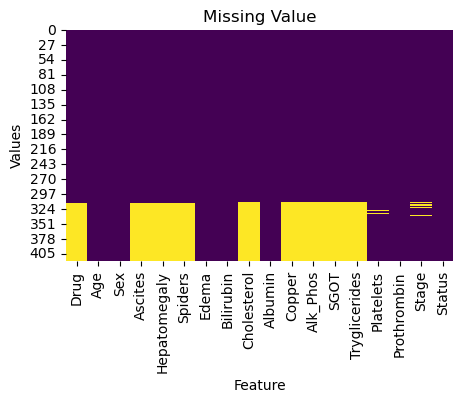

In [19]:
plt.figure(figsize=(5, 3))
sns.heatmap(df_cancer.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value")
plt.xlabel("Feature")
plt.ylabel("Values")
plt.show()

In [19]:
df_copy_cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,418.0,18533.351675,3815.845055,9598.00,15644.500000,18628.000000,21272.500000,28650.00
Sex,418.0,1.105263,0.307260,1.00,1.000000,1.000000,1.000000,2.00
Ascites,418.0,0.062201,0.251531,0.00,0.000000,0.000000,0.000000,2.00
Hepatomegaly,418.0,0.638756,0.485897,0.00,0.000000,1.000000,1.000000,2.00
Spiders,418.0,0.220096,0.420549,0.00,0.000000,0.000000,0.000000,2.00
Bilirubin,418.0,3.220813,4.407506,0.30,0.800000,1.400000,3.400000,28.00
Cholesterol,418.0,367.724944,192.062818,120.00,268.662604,367.724944,368.248969,1775.00
Albumin,418.0,3.497440,0.424972,1.96,3.242500,3.530000,3.770000,4.64
Copper,418.0,97.594323,73.701343,4.00,51.250000,97.594323,100.750000,588.00
Alk_Phos,418.0,1982.655769,1848.437803,289.00,1016.250000,1717.000000,1982.655769,13862.40


**independent:
drug 
age
sex
Ascites
Hepatomegaly
Spiders
Edema
Bilirubin
Cholesterol
Albumin
Copper
Alk_Phos
SGOT
Tryglicerides
Platelets
Prothrombin
stage
**dependent:
status

In [20]:
df_copy_cancer['Sex'].value_counts()

Sex
1    374
2     44
Name: count, dtype: int64

# <font color=#00BBFF> Creating a new column to store age_year </font>

In [21]:
age_column_name = 'Age'
df_copy_cancer['Age'] = df_copy_cancer[age_column_name] / 365
df_copy_cancer['Age_year'] = np.round(df_copy_cancer['Age'] / 10) * 10

In [22]:
df_copy_cancer['Platelets'] = (
    df_copy_cancer['Platelets']
    .astype(str)                                # 確保所有內容都是字串，以便進行字串操作
    .str.replace(',', '', regex=False)          # 移除所有逗號 (,)
    .replace(['?', '-', 'NA', 'N/A', '','NaNN'], np.nan) # 將常見的非數字表示的缺失值替換為 NaN
    .astype(float)                              # 轉換為浮點數，這樣可以處理 NaN (因為 int 類型不能直接包含 NaN)
)

# 2. 將 NaN 替換為適當的值並轉換為 int
# 由於 int64 不能包含 NaN，您必須決定如何處理在步驟 1 中產生的 NaN 值：

# 選項 A (建議): 用平均值或中位數填充 NaN，然後轉換為 int64
# df['Platelets'] = df['Platelets'].fillna(df['Platelets'].mean()).round().astype('int64')

# 選項 B: 用 0 填充 NaN，然後轉換為 int64
df_copy_cancer['Platelets'] = df_copy_cancer['Platelets'].fillna(0).astype('int64')

# 選項 C (適用於 Pandas 1.0+): 轉換為支持 NaN 的整數類型
# df['Platelets'] = df['Platelets'].astype('Int64') # 注意是大寫 I，它允許 NaN

# <font color=#00BBFF> Checking values of every single features</font>

In [35]:
df_copy_cancer.isnull().sum()

Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
Age_year         0
dtype: int64

# <font color=#00BBFF> Visualization</font>

In [94]:
plt.rcParams.update({
    'figure.facecolor': 'white',  # 整個畫布的背景色
    'axes.facecolor': 'white',    # 座標軸的背景色
    'axes.edgecolor': 'black',    # 座標軸邊框
    'axes.spines.top': True,
    'axes.spines.right': True,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'axes.grid': False,
    'grid.color': 'gray',
    'grid.alpha': 0.3,
    'figure.figsize': [12, 10],
    'figure.dpi': 120,
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif'],
    'axes.linewidth': 1.5,
    'xtick.major.size': 5,
    'ytick.major.size': 5,
    'xtick.major.width': 1.5,
    'ytick.major.width': 1.5,
    'text.usetex': False,
    'axes.autolimit_mode': 'round_numbers',
    'axes.xmargin': 0.1,
    'axes.ymargin': 0.1,
    'axes.prop_cycle': plt.cycler('color', ['#0077BB', '#33BBEE', '#009988', '#EE7733', '#CC3311', '#EE3377', '#BBBBBB'])
})

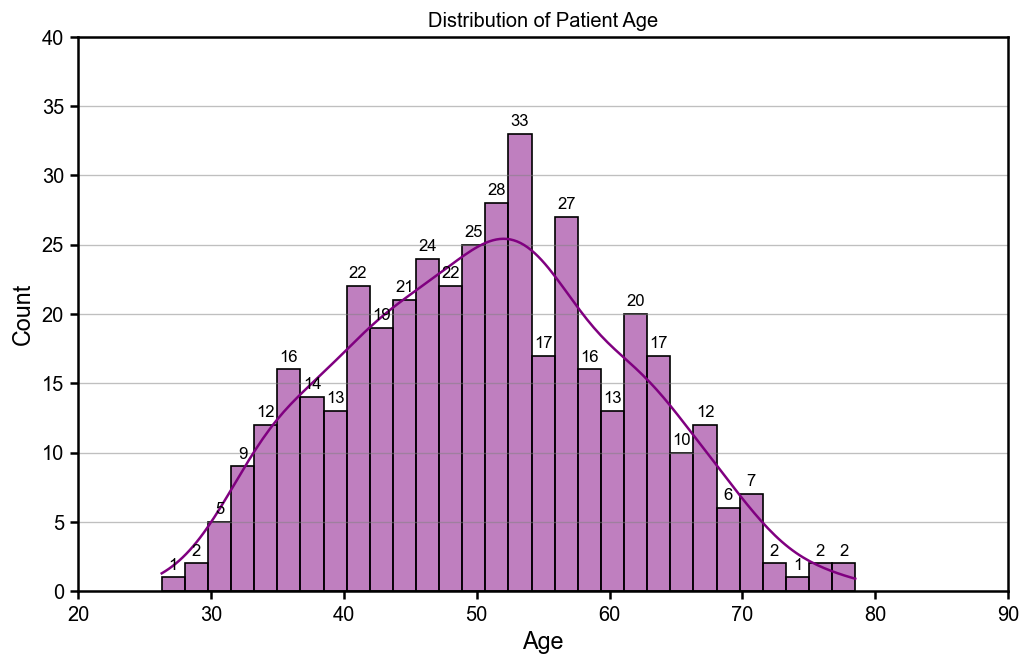

In [95]:
plt.figure(figsize=(10, 6))
ax_plots=sns.histplot(
    data=df_copy_cancer,
    kde=True, #adding curve in plot
    x='Age',  
    bins=30,  
    color='purple',
    edgecolor='black'
)
for num in ax_plots.containers: #containers is Matplotlib of property 
    labels = [int(h) for h in num.datavalues] #datavalues also a Metaplotlib of property
    non_zero_labels = [str(y) if y > 0 else '' for y in labels]#turn int to str, so we can let 0 became space
    ax_plots.bar_label(num, non_zero_labels, padding=3) #padding=3 means leave distance of 3 units
        
plt.title('Distribution of Patient Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True, axis='y', alpha=0.5)
plt.show()

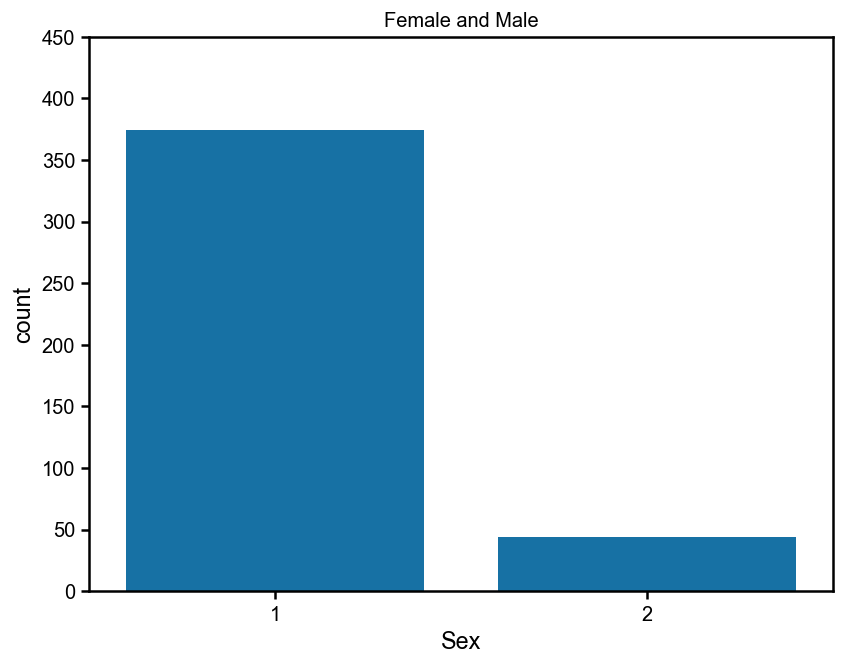

In [96]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_copy_cancer, x='Sex')
plt.title("Female and Male")
plt.show()


--- Drug Frequenccy ---
Drug
D-penicillamine    62.92%
Placebo            36.84%
NaNN                0.24%
Name: proportion, dtype: object

--- Sex Frequenccy ---
Sex
1    89.47%
2    10.53%
Name: proportion, dtype: object

--- Ascites Frequenccy ---
Ascites
0    94.02%
1     5.74%
2     0.24%
Name: proportion, dtype: object

--- Hepatomegaly Frequenccy ---
Hepatomegaly
1     63.4%
0    36.36%
2     0.24%
Name: proportion, dtype: object

--- Spiders Frequenccy ---
Spiders
0    78.23%
1    21.53%
2     0.24%
Name: proportion, dtype: object

--- Edema Frequenccy ---
Edema
N    84.69%
S    10.53%
Y     4.78%
Name: proportion, dtype: object

--- Status Frequenccy ---
Status
C      55.5%
D     38.52%
CL     5.98%
Name: proportion, dtype: object


<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

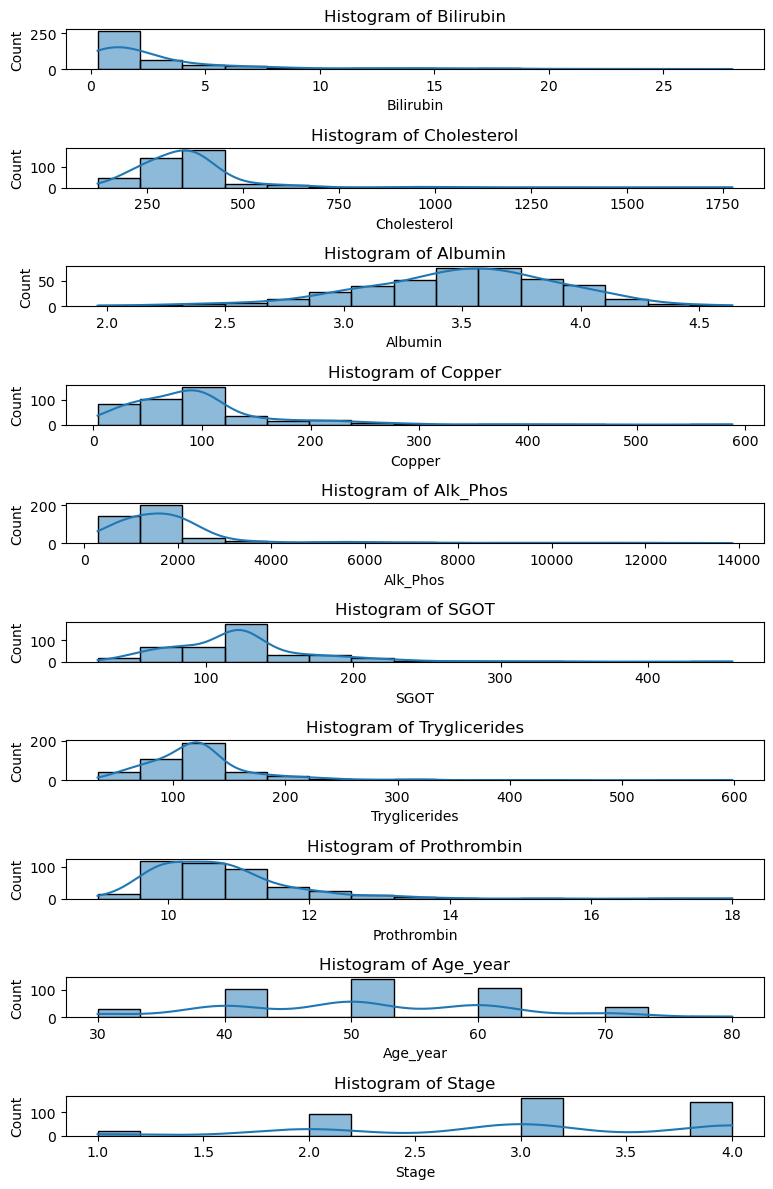

In [41]:
numeric_cols = ['Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 
    'Alk_Phos', 'SGOT', 'Tryglicerides', 'Prothrombin', 'Age_year', 'Stage']

categorical_cols = [ 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 
    'Edema', 'Status'
]
for col in categorical_cols:
    print(f"\n--- {col} Frequenccy ---")
    print(df_copy_cancer[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

    plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols):
    # 直方圖
    plt.subplot(len(numeric_cols), 2, 2*i + 1)
    sns.histplot(df_copy_cancer[col], kde=True, bins=15)
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

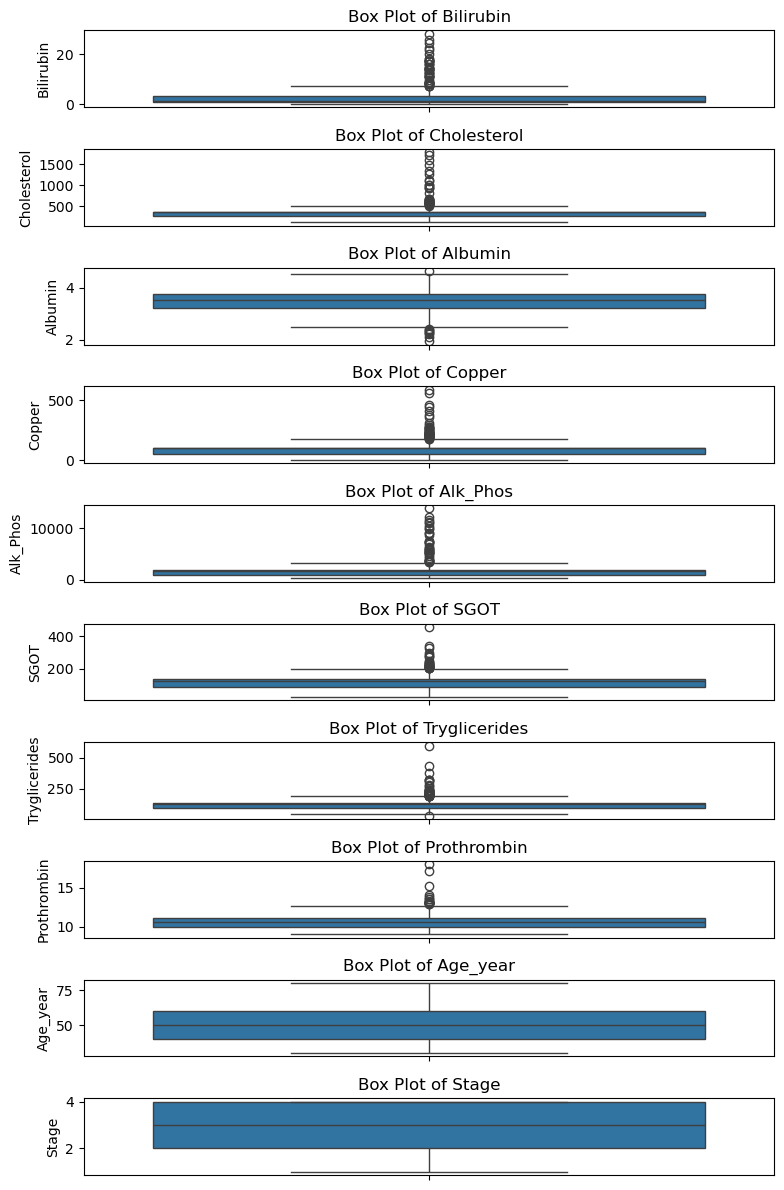

In [44]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols):
    # 箱型圖
    plt.subplot(len(numeric_cols), 2, 2*i + 2)
    sns.boxplot(y=df_copy_cancer[col])
    plt.title(f'Box Plot of {col}')

    plt.tight_layout()
plt.show()

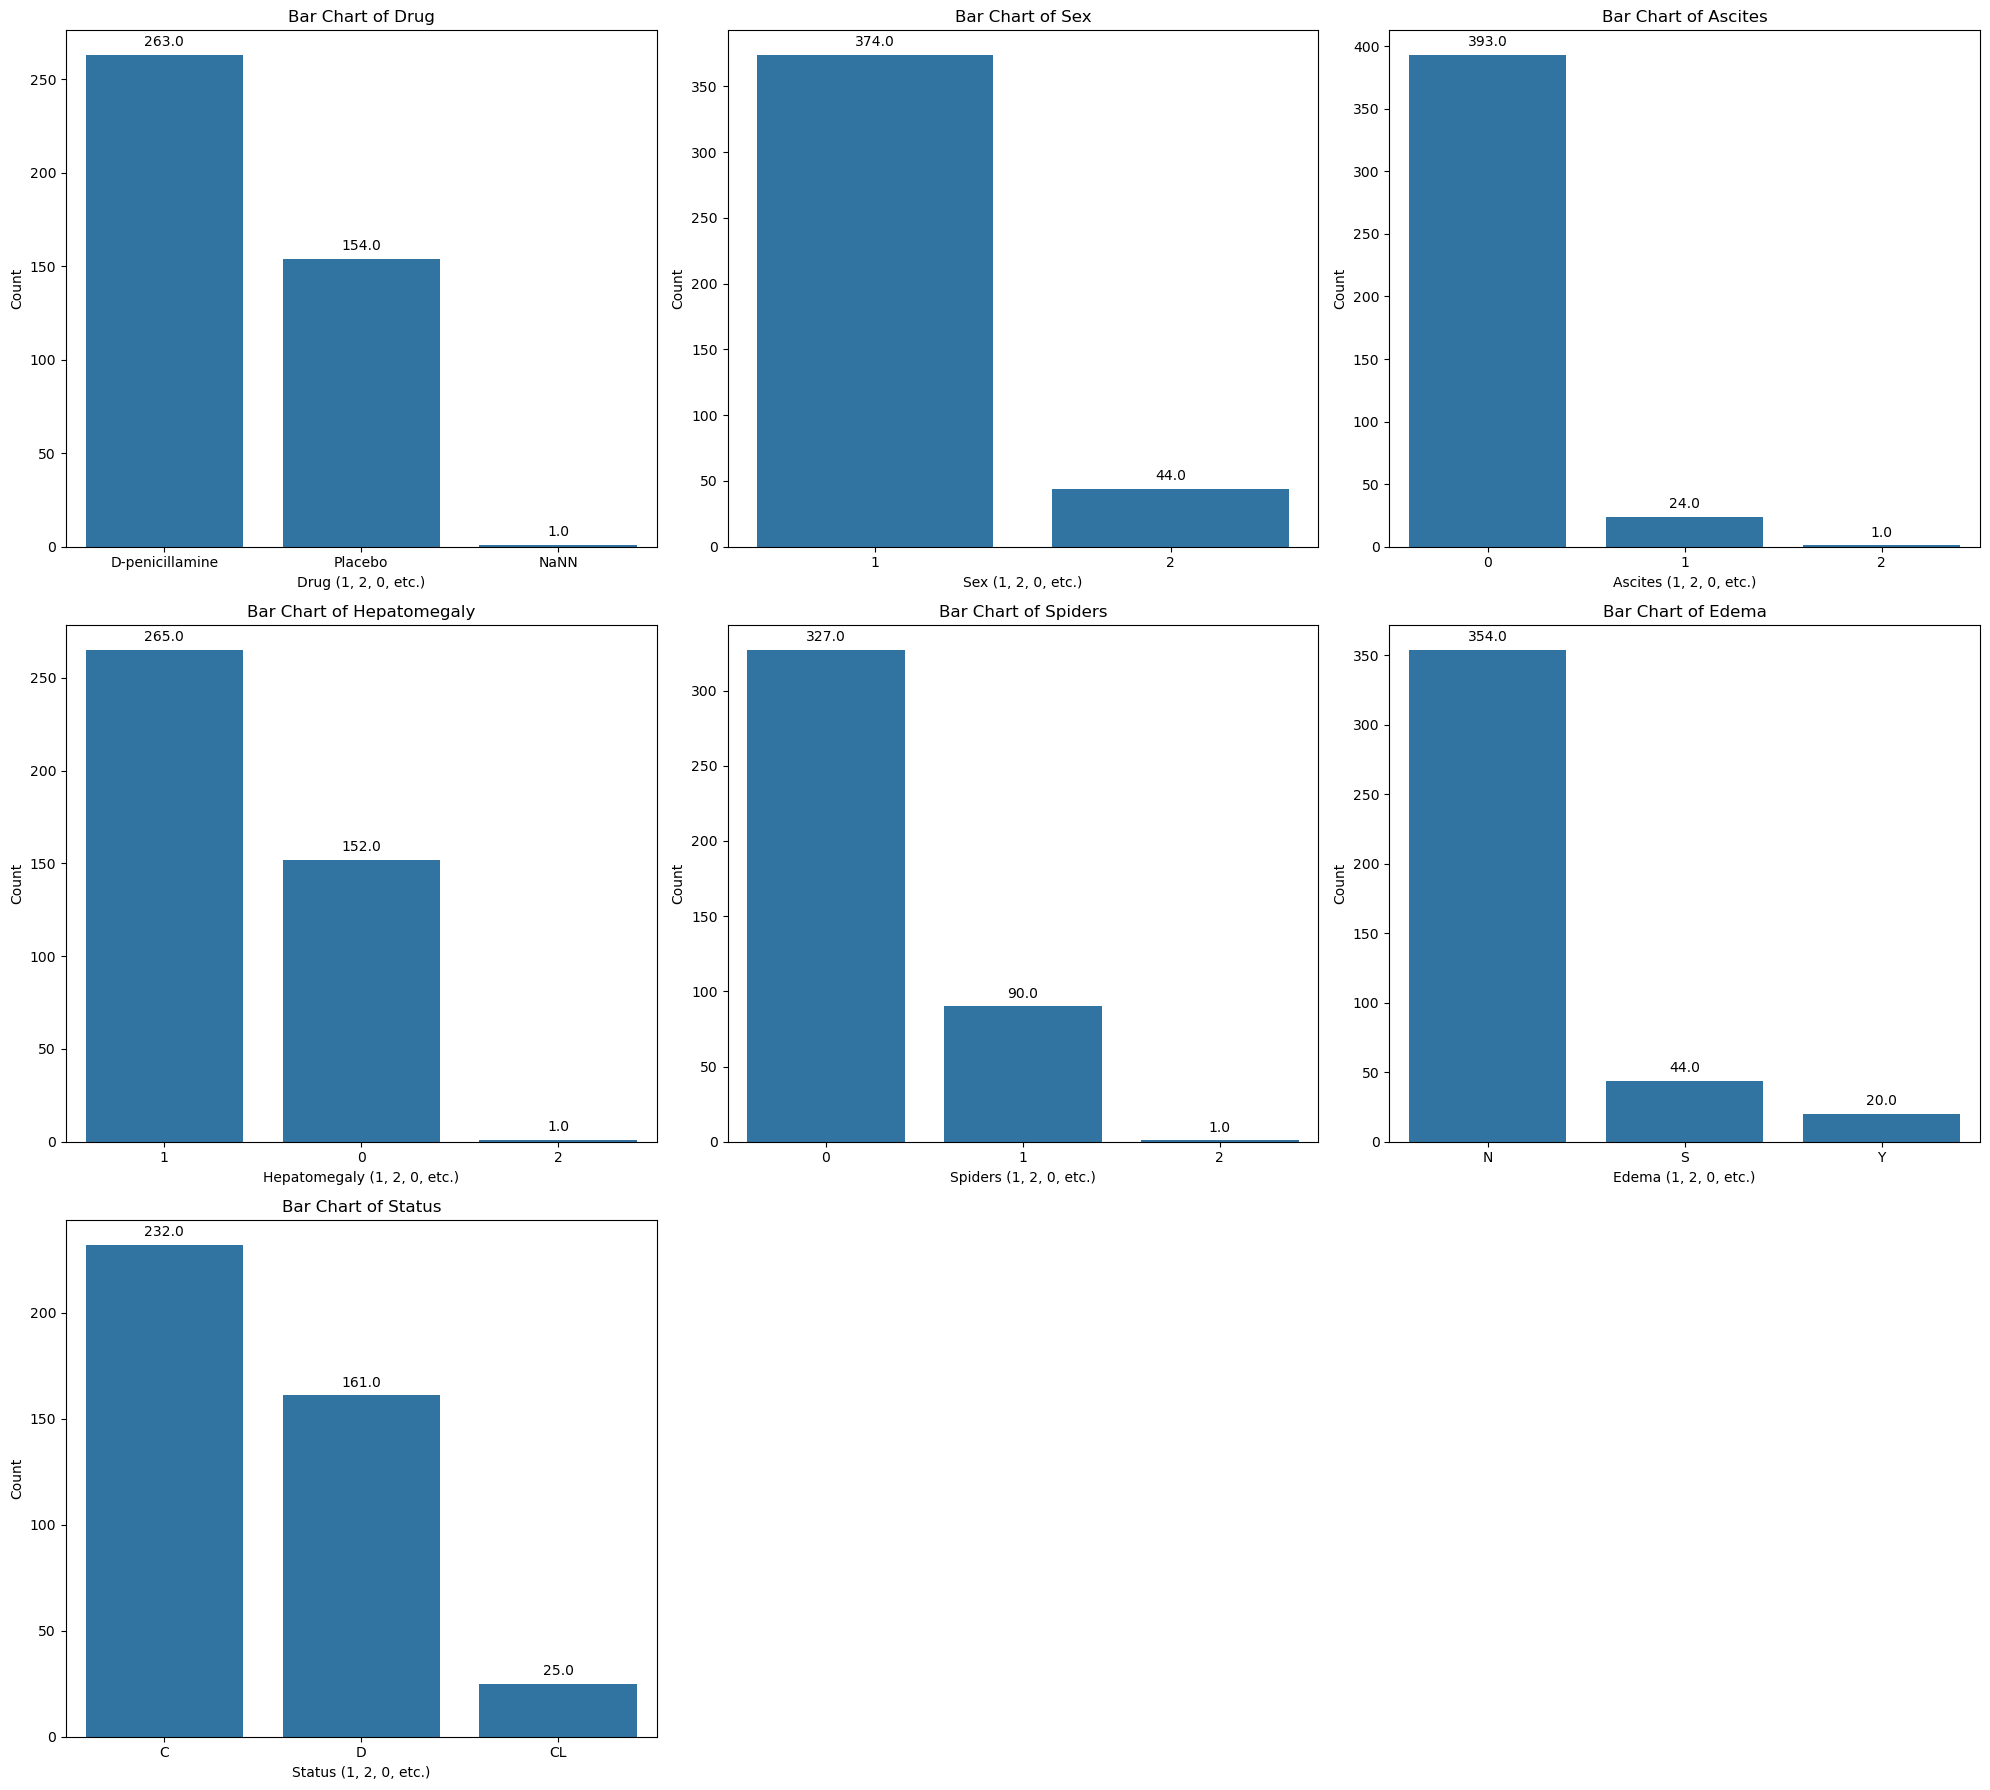

In [37]:
plt.figure(figsize=(20, 18))
n_rows = int(np.ceil(len(categorical_cols) / 3))

for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, 3, i + 1)
    ax = sns.countplot(x=col, data=df_copy_cancer, order=df_copy_cancer[col].value_counts().index)
    
    # 標記實際數值 (如果需要)
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
    
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(f'{col} (1, 2, 0, etc.)') # 提醒自己這些是編碼
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

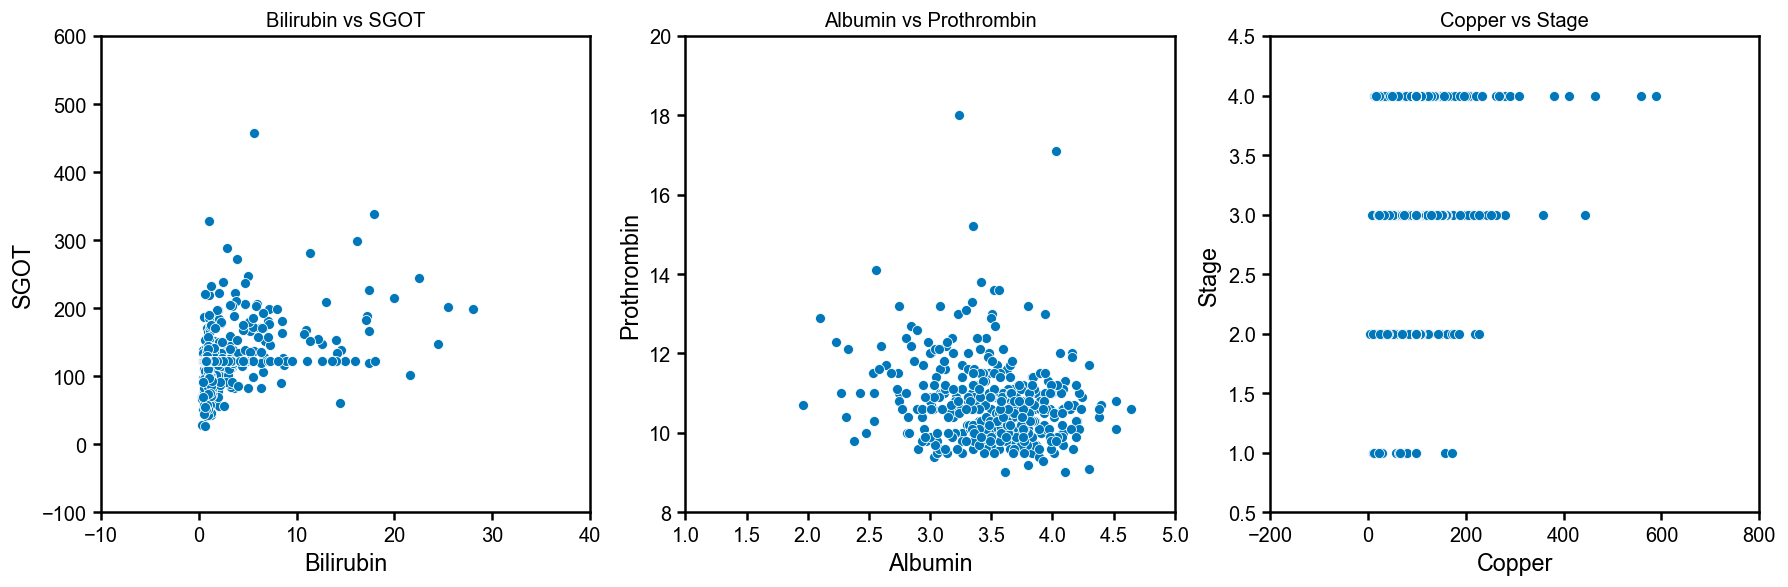

In [100]:
plt.figure(figsize=(15, 5))

# 圖 1: 總膽紅素 (Bilirubin) 與 SGOT 的關係
plt.subplot(1, 3, 1)
sns.scatterplot(x='Bilirubin', y='SGOT', data=df_copy_cancer)
plt.title('Bilirubin vs SGOT')

# 圖 2: 白蛋白 (Albumin) 與凝血酶原 (Prothrombin) 的關係 (通常具負相關)
plt.subplot(1, 3, 2)
sns.scatterplot(x='Albumin', y='Prothrombin', data=df_copy_cancer)
plt.title('Albumin vs Prothrombin')

# 圖 3: 銅 (Copper) 與 Stage 的關係
plt.subplot(1, 3, 3)
sns.scatterplot(x='Copper', y='Stage', data=df_copy_cancer)
plt.title('Copper vs Stage')

plt.tight_layout()
plt.show()


--- Sex vs Status cross-tabulations ---
Status       C      CL       D
Sex                           
1       0.5749  0.0588  0.3663
2       0.3864  0.0682  0.5455


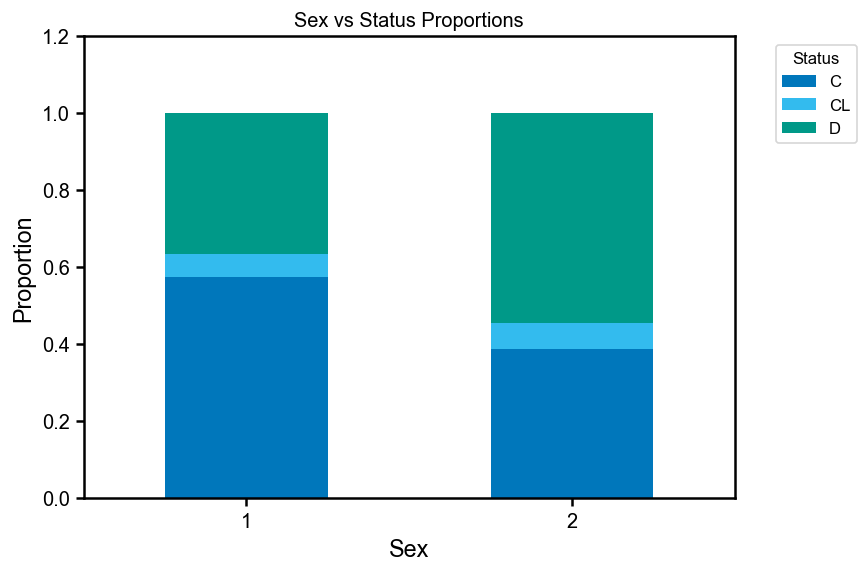

In [102]:
# 選擇目標變數 'Status' 和一個類別變數 'Sex'
target_var = 'Status'
cat_var_1 = 'Sex'

print(f"\n--- {cat_var_1} vs {target_var} cross-tabulations ---")

# 計算交叉表 (請注意：如果 Status 包含多個字串值，結果會非常詳細)
crosstab_proportions = pd.crosstab(
    df_copy_cancer[cat_var_1], 
    df_copy_cancer[target_var], 
    normalize='index'
).round(4)

print(crosstab_proportions)

# 繪製堆疊長條圖 (視覺化交叉表結果)
plt.figure(figsize=(7, 5))
crosstab_proportions.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title(f'{cat_var_1} vs {target_var} Proportions')
plt.xlabel(cat_var_1)
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title=target_var, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [105]:
fig_violin_class_age = px.violin(df_copy_cancer, x='Status', y='Age_year', box=True, points='all',
                           labels={'Status':'Status', 'Age_year':'Age'},
                           title="Interactive Violin Plot of Age vs Status")
fig_violin_class_age.show()

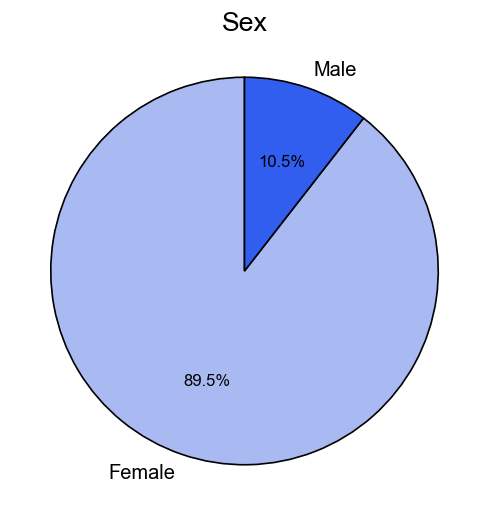

In [108]:
sex_counts = df_copy_cancer['Sex'].value_counts()
plt.figure(figsize=(5, 5))
values = sex_counts.values
labels = sex_counts.index.astype(str).tolist() # 將索引轉換為字串作為標籤
labels = ['Female', 'Male'] 

plt.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=["#a9baf2", "#315eef"], # 自定義顏色
    wedgeprops={'edgecolor': 'black'} # 增加邊框讓扇區更清晰
)
plt.title('Sex', fontsize=16)
plt.axis('equal') 
plt.show()

In [110]:
continuous_cols=['Albumin', 'Ascites', 'Bilirubin', 'Alk_Phos']
correlation_matrix = df_copy_cancer[continuous_cols].corr().round(4).values #round() can let decrease the number of decimal places 
fig_heatmap = ff.create_annotated_heatmap(
    z=correlation_matrix,
    x=continuous_cols,
    y=continuous_cols,
    colorscale='Reds' # you can use "Plasma", "Viridis", "Reds", "Blues", "RdBu", "Portland", "Spectral"
)
fig_heatmap.update_layout(
    font=dict(size=10),
    title="Correlation Heatmap (Interactive)",
    xaxis_title="Features",
    yaxis_title="Features"
)
fig_heatmap.show()